In [2]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)

# Print the project root to verify
print(f"Project root: {project_root}")

Project root: /home/lydia/Projects/Solar-Data


In [ ]:
import src.analysis.analyzer as analyzer
import src.preprocessing.preprocessor as preprocessor
import src.visualization.visualization as visualization

In [ ]:
# Load the data
df = preprocessor.load_and_preview("../data/sierraleone-bumbuna.csv")

First few rows of the dataset:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       N

In [ ]:
# summary and check for missing values
analyzer.summarize_and_check_missing(df)

Summary Statistics & Missing-Value Report:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.

Comments    1.0
dtype: float64

In [ ]:
# Outlier Detection & Basic Cleaning
print("Outlier Detection & Basic Cleaning:")

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

df = analyzer.detect_and_remove_outliers(df, key_columns)

print("Outlier Detection & Basic Cleaning Done.")

Outlier Detection & Basic Cleaning:
Number of outliers: 16292
removing outliers...
Outlier Detection & Basic Cleaning Done.


In [ ]:
# normalize the negative data to zero

# checking the rows with invalid values (irradiance targeted)
irradiance_cols = ["GHI", "DNI", "DHI", "ModA", "ModB"]

df = analyzer.normalize_negative_to_zero(df, irradiance_cols)

print("Negative values normalized to zero.")

GHI: 259381 values < 0
DNI: 263914 values < 0
DHI: 261357 values < 0
ModA: 0 values < 0
ModB: 0 values < 0
Negative values normalized to zero.


In [ ]:
# save the cleaned data
print("Saving the cleaned data...")
country = "sierraleone"  # change accordingly

preprocessor.save_cleaned_data(df, country)

Saving the cleaned data...
Cleaned data exported to: ../data/sierraleone_clean.csv


In [ ]:
# Time Series Analysis
print("Time Series Analysis:")

df = visualization.prepare_time_series(df)

Time Series Analysis:


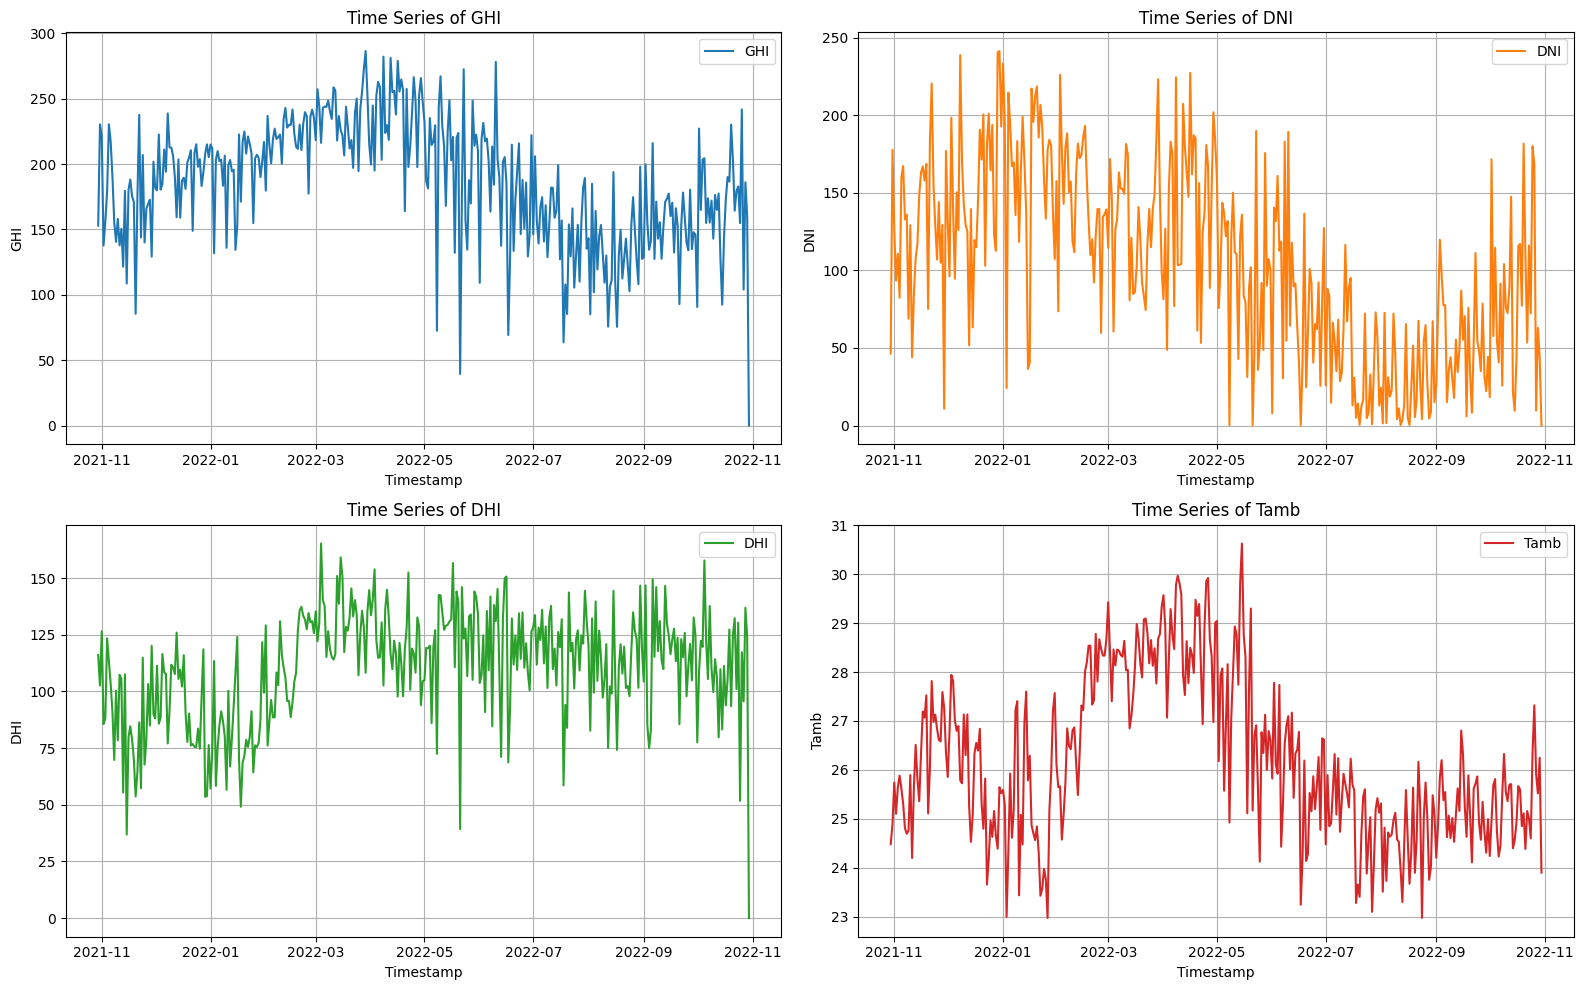

In [ ]:
# Define the columns to plot
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

visualization.plot_time_series(df, columns)


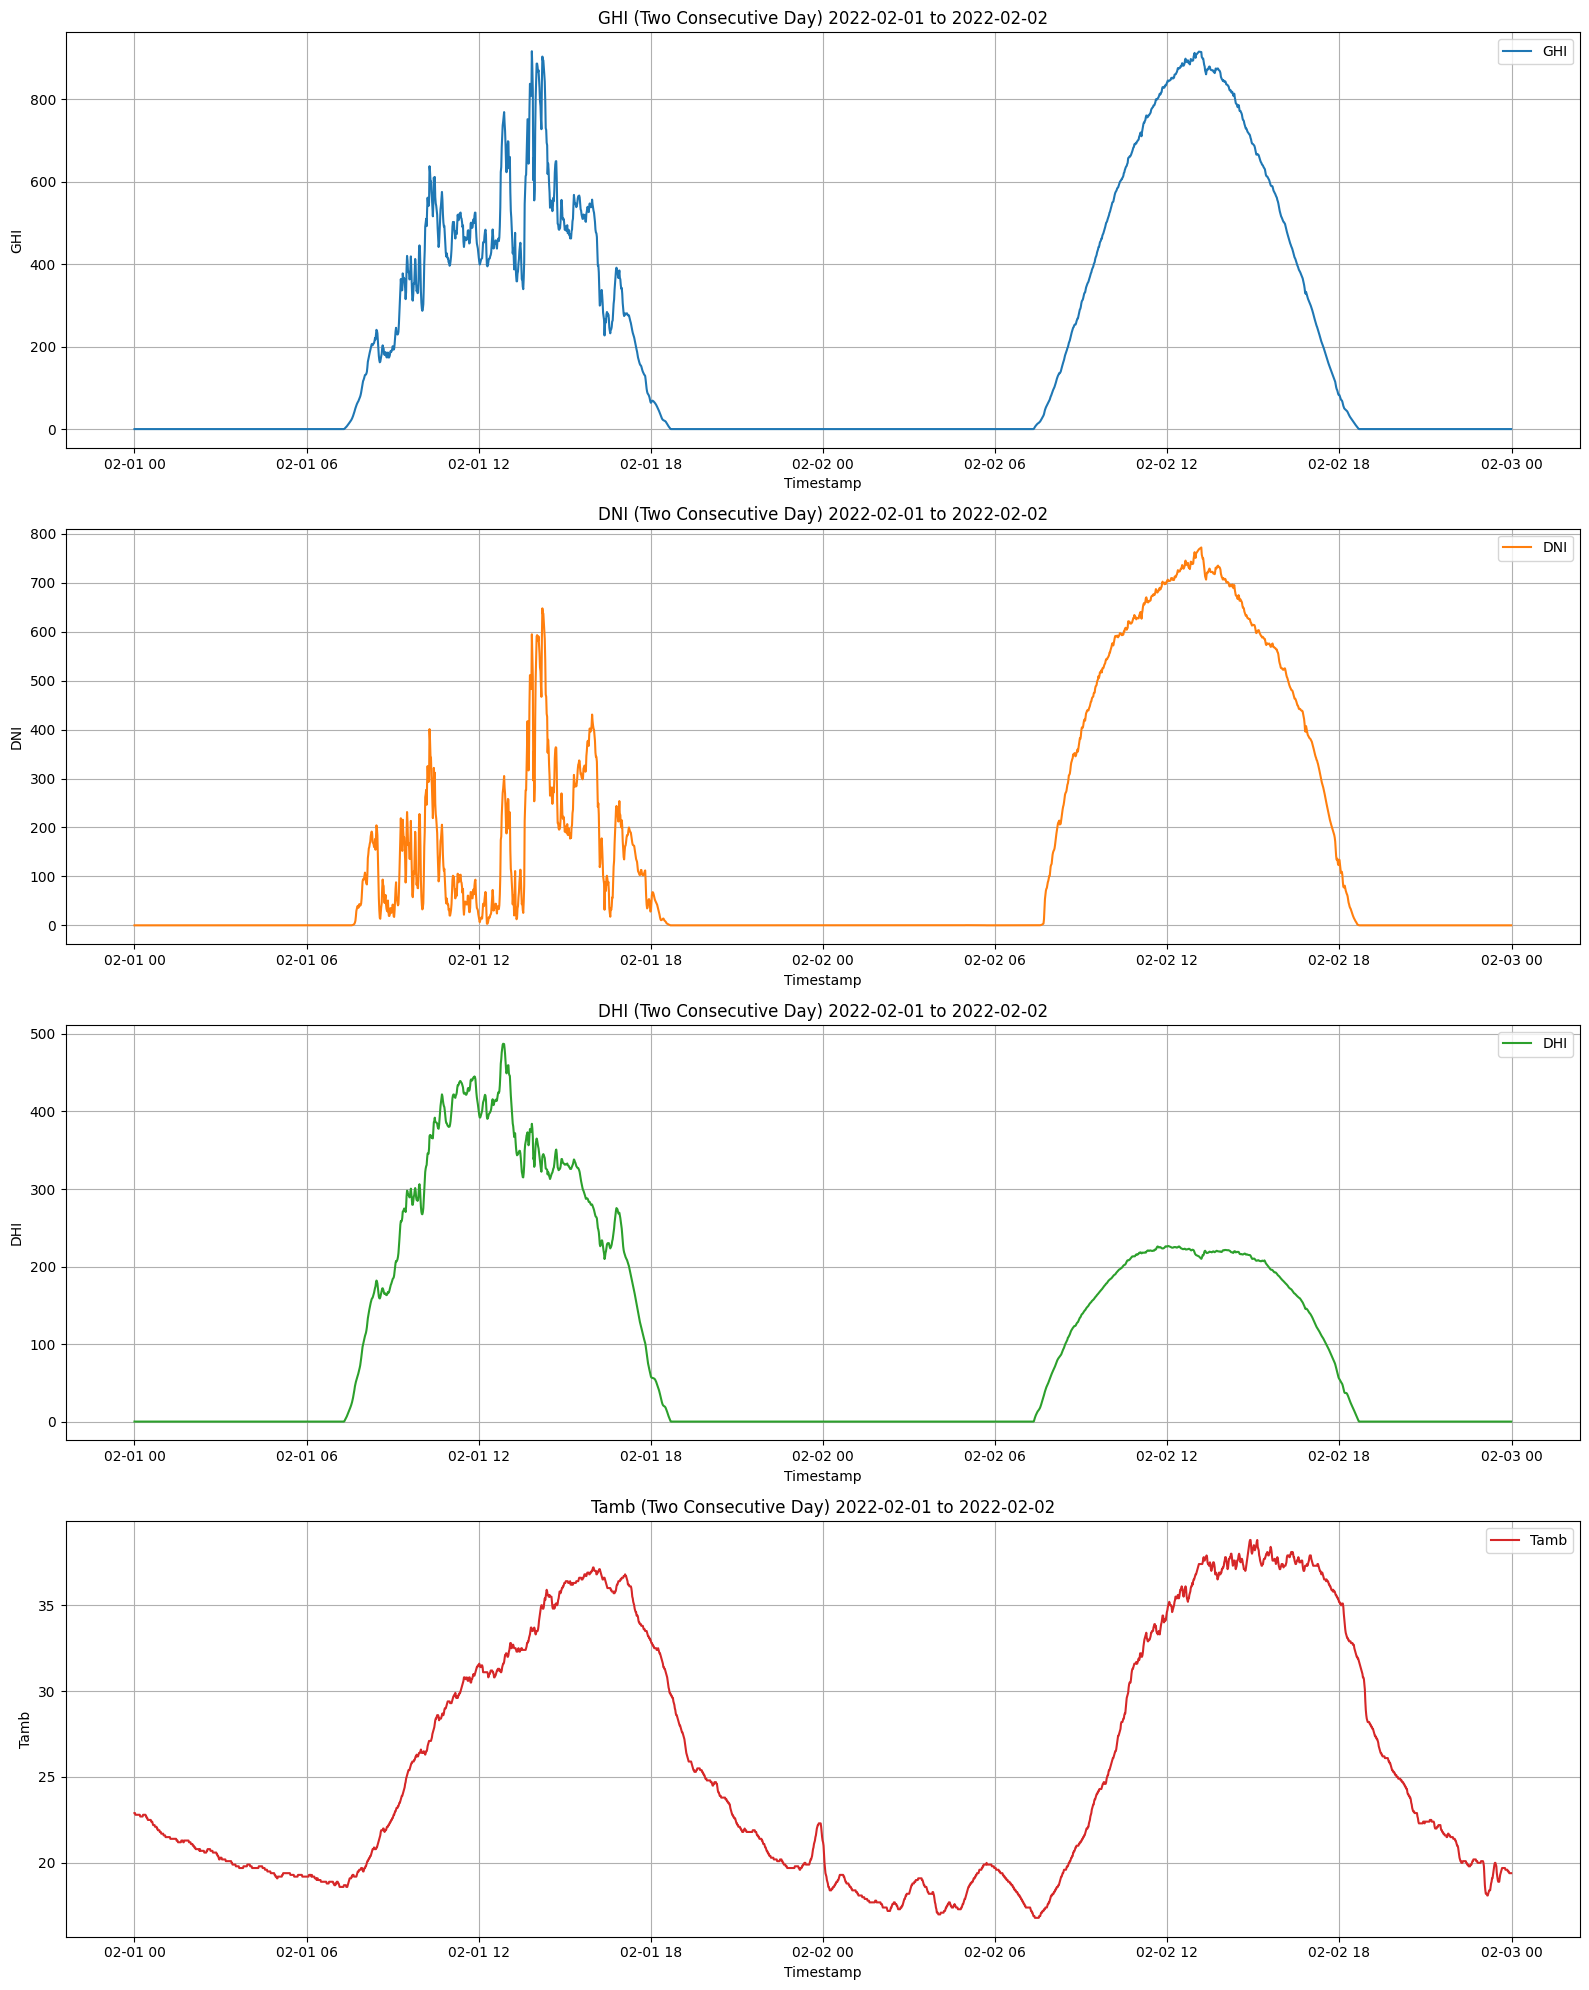

In [ ]:
# two day of data
visualization.plot_period(df, columns, "2022-02-01", "2022-02-02", "Two Consecutive Day")


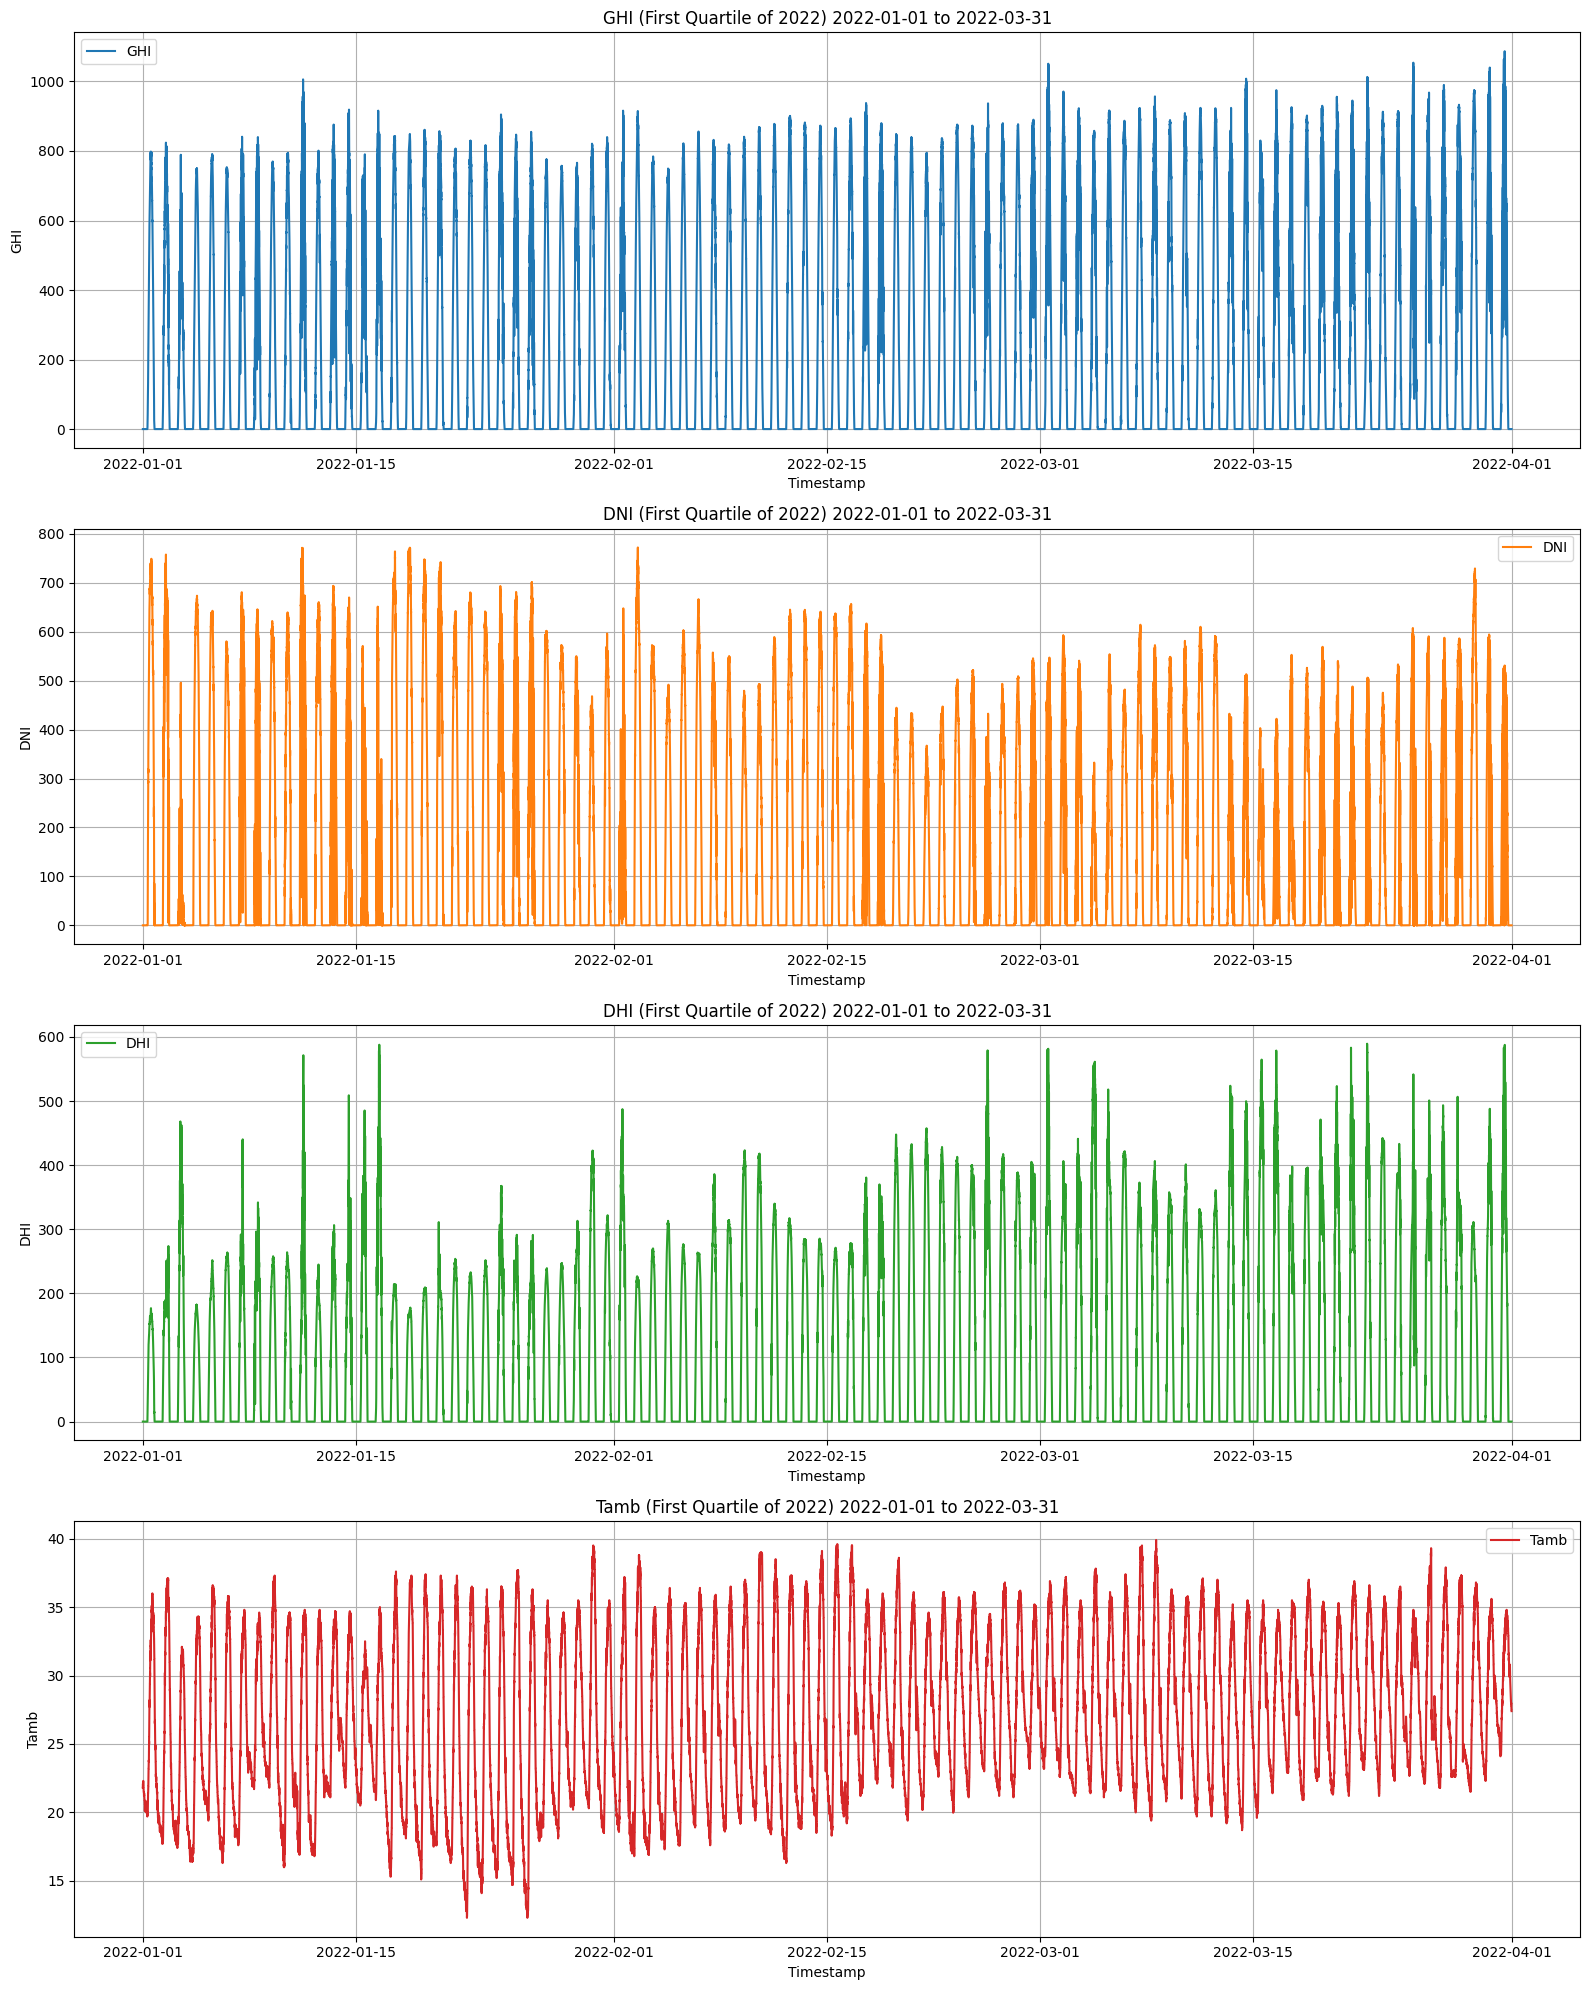

In [ ]:
#one quartile year
visualization.plot_period(df, columns, '2022-01-01','2022-03-31', "First Quartile of 2022")

Plotting the cleaning effect on ModA and ModB...


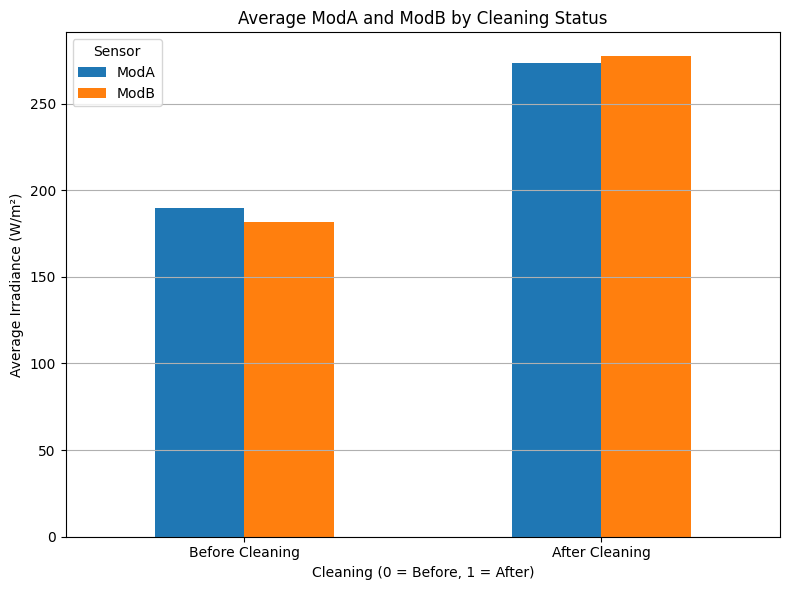

In [ ]:
# Group by 'Cleaning' flag and compute mean for ModA and ModB
print("Plotting the cleaning effect on ModA and ModB...")
visualization.plot_cleaning_effect(df)

Plotting correlation heatmap...


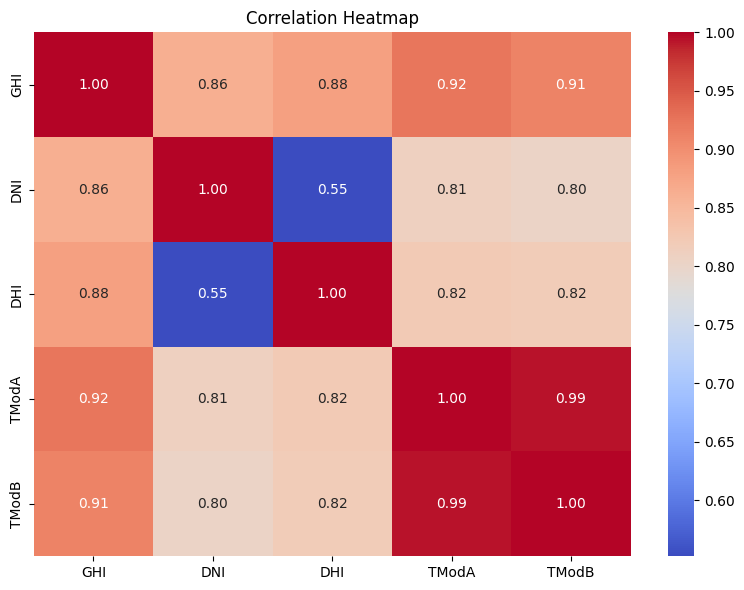

In [ ]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

print("Plotting correlation heatmap...")
# Plot heatmap
visualization.plot_correlation_heatmap(df, corr_cols)


Scatter Plots of selected pairs:


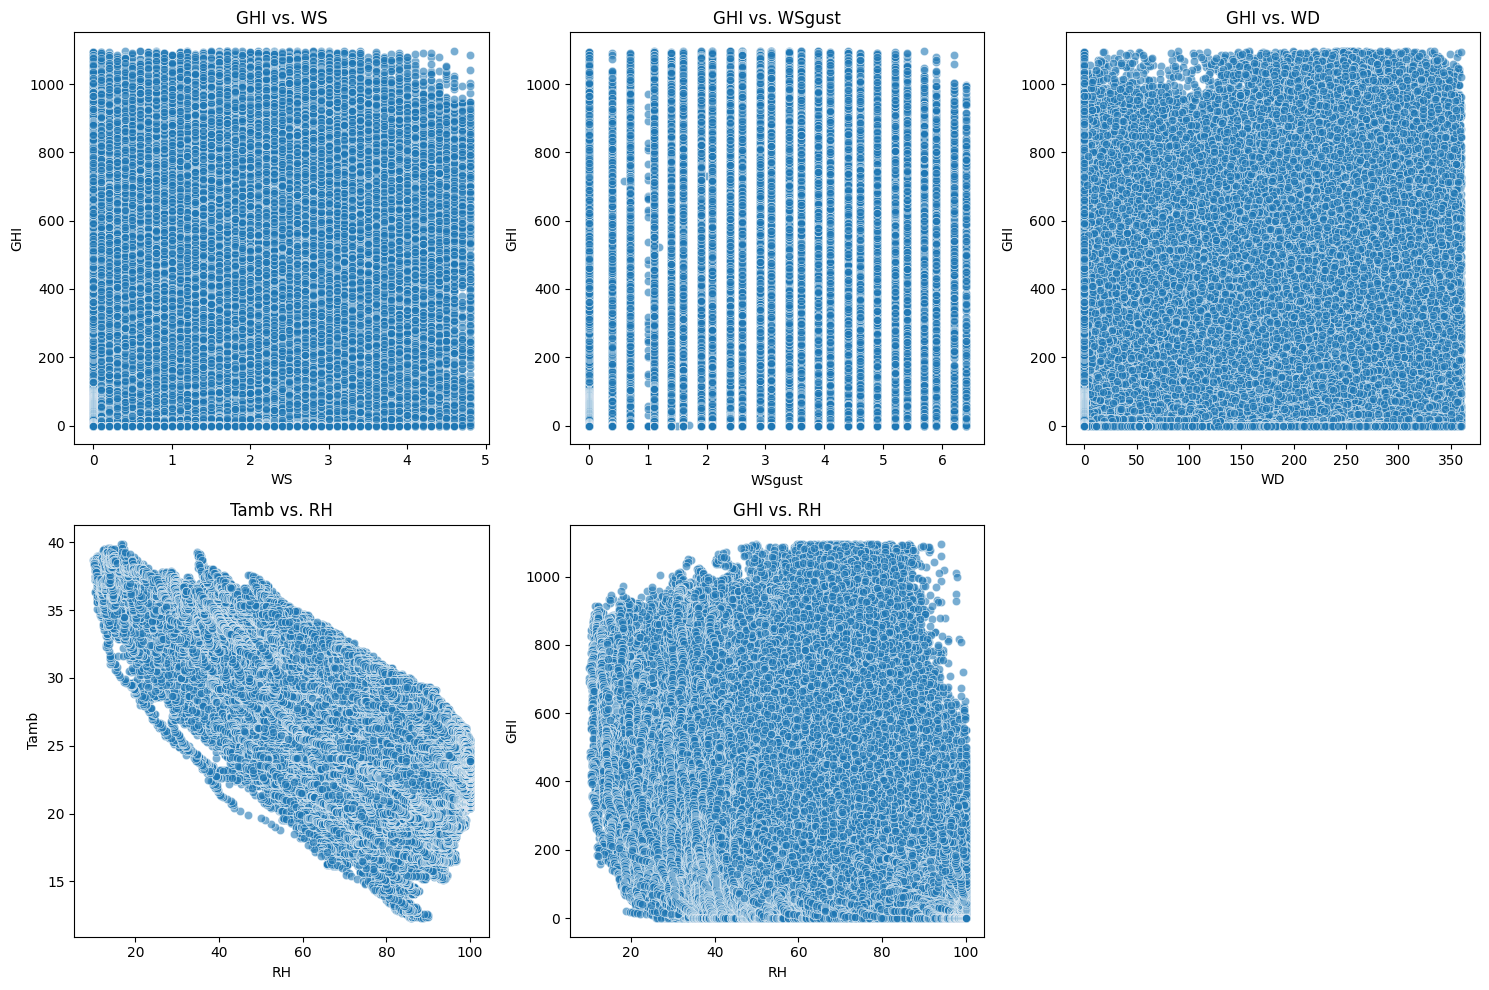

In [ ]:
# Scatter Plots of selected pairs
print("Scatter Plots of selected pairs:")
# Define pairs of columns to scatter plot
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

# Create scatter plots for each pair
visualization.plot_scatter_pairs(df, scatter_pairs)


Histograms of GHI and Wind Speed:


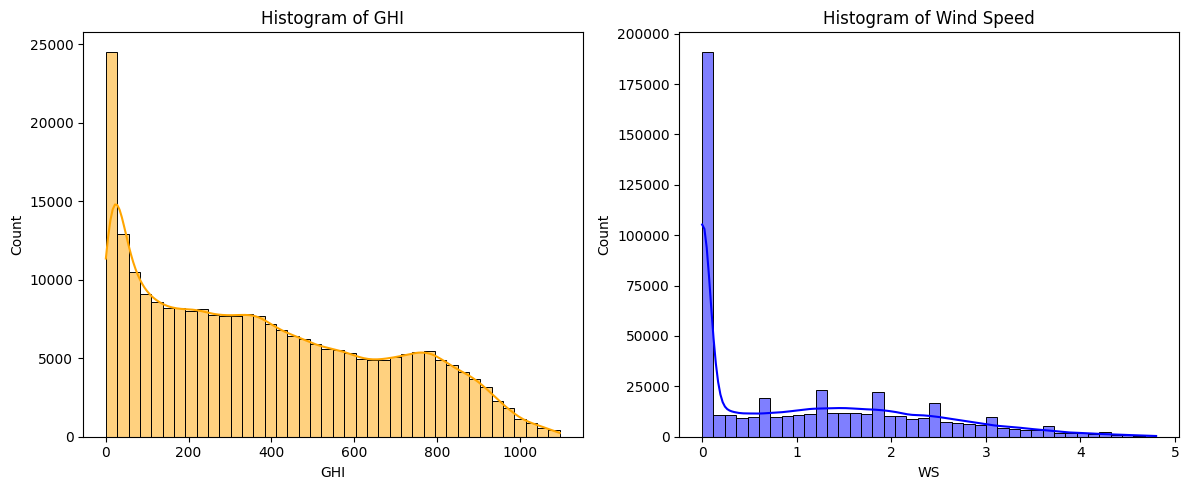

In [ ]:
# Histograms of GHI and Wind Speed
print("Histograms of GHI and Wind Speed:")

visualization.plot_histograms(df)

Windrose plot for wind speed and direction:


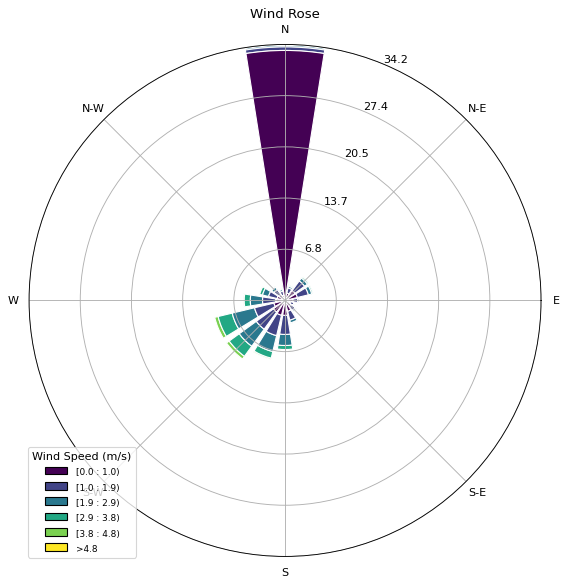

In [ ]:
# windrose plot for wind speed and direction
print("Windrose plot for wind speed and direction:")

visualization.plot_wind_rose(df)


Effect of RH on Temperature and GHI:


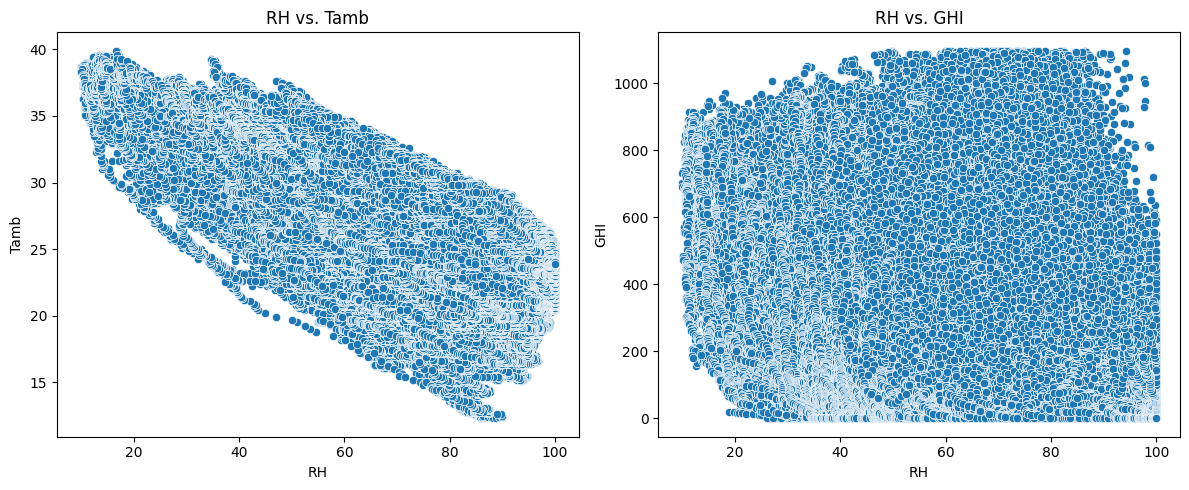

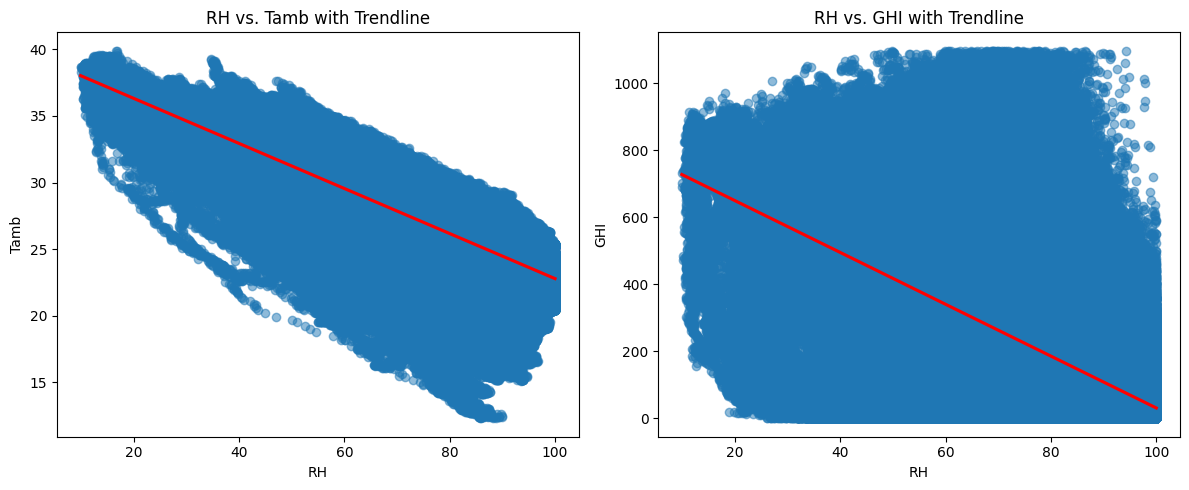

In [ ]:
# Effect of RH on Temperature and GHI
print("Effect of RH on Temperature and GHI:")

visualization.plot_rh_effect(df)

Bubble chart of GHI vs Tamb with bubble size as RH:


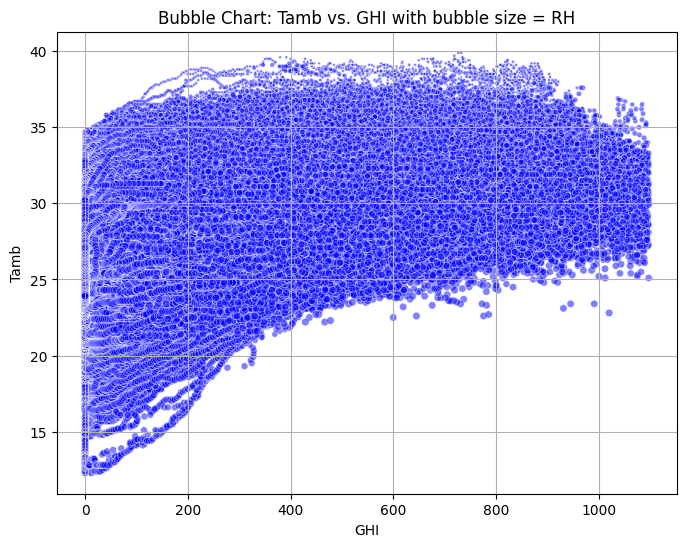

In [ ]:
# bubble chart of GHI vs Tamb with bubble size as RH
print("Bubble chart of GHI vs Tamb with bubble size as RH:")
visualization.plot_bubble_chart(df, 'RH')
